In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as mpimg

(512, 512, 1)


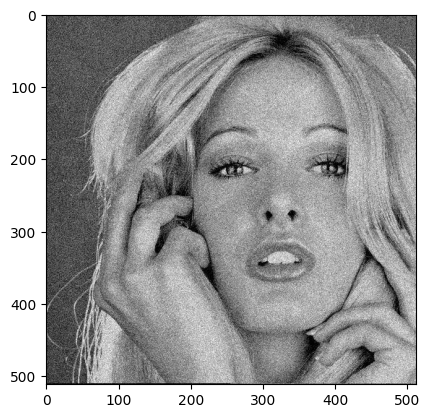

In [2]:

img = mpimg.imread("original.jpg")

def imshow(img):
    if len(img.shape) < 3:
        plt.imshow(img, cmap="gray")
    elif img.shape[2] == 1:
        plt.imshow(np.resize(img,(img.shape[0],img.shape[1])), cmap="gray")
    else:
        plt.imshow(img)


if len(img.shape) < 3:
    img.resize(*img.shape,1)

imshow(img)

print(img.shape)

True

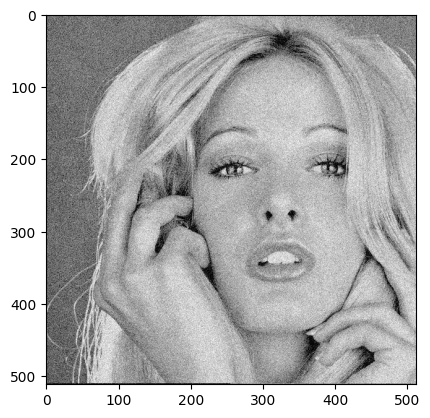

In [3]:
# Gamma Coorection
def gammaCorrection(img, gamma):
    out = np.power(img.copy(), gamma)
    return out.astype(np.uint8)

imshow(gammaCorrection(img,0.7))


cv2.imwrite("gamma.jpg",img)

In [4]:

# low pass filter
(lpfw,lpfh) = (3,3)
lowPassFilter = np.ones((lpfw,lpfh))*1/(lpfw*lpfh)


# high pass filter
(hpfw,hpfh) = (3,3)
highPassFilter = -1*np.ones((hpfw,hpfh))
highPassFilter[hpfw//2,hpfh//2] = -np.sum(highPassFilter)-1


# gaussian filter
def gfunc(x,y,sigma):
    return (math.exp(-(x**2 + y**2)/(2*(sigma**2))))/(2*3.14*(sigma**2))

def gaussFilter(size, sigma):
    out = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            out[i,j] = gfunc(i-size[0]//2,j-size[1]//2, sigma )
    return out/np.sum(out)

(gfw,gfh) = (3,3)
gaussianFilter = gaussFilter((gfw,gfh),1)

print("Low Pass Filter")
print(lowPassFilter)

print("High Pass Filter")
print(highPassFilter)

print("Gaussian Filter")
print(gaussianFilter)

Low Pass Filter
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
High Pass Filter
[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
Gaussian Filter
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


 ========================================= Low Pass Filter =========================================


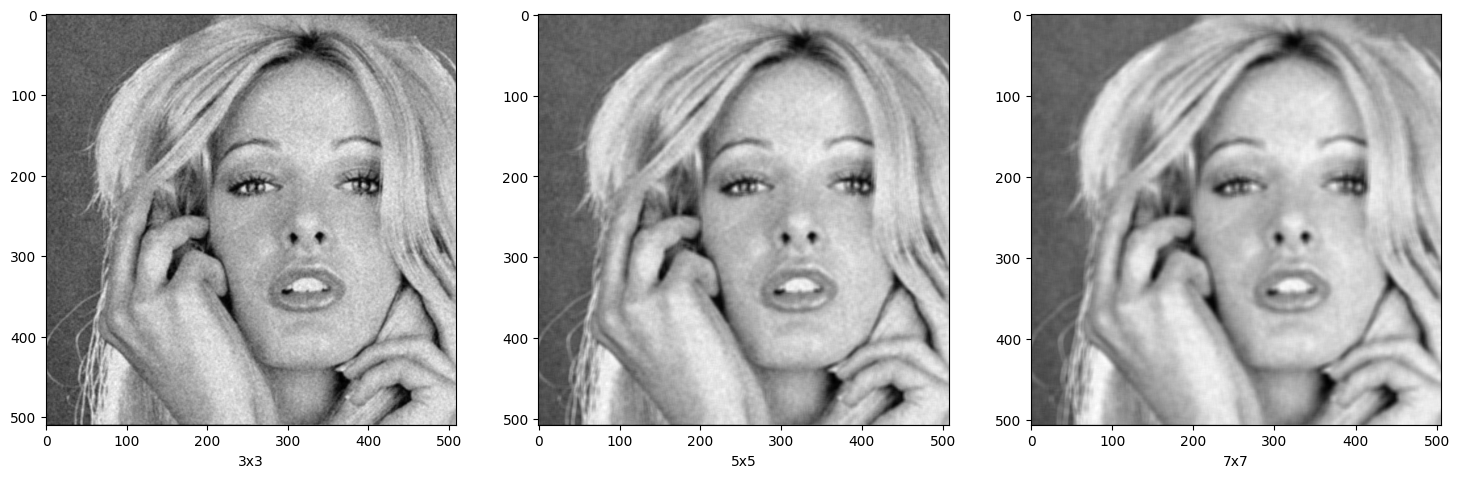


 ========================================= Gaussian Filter =========================================


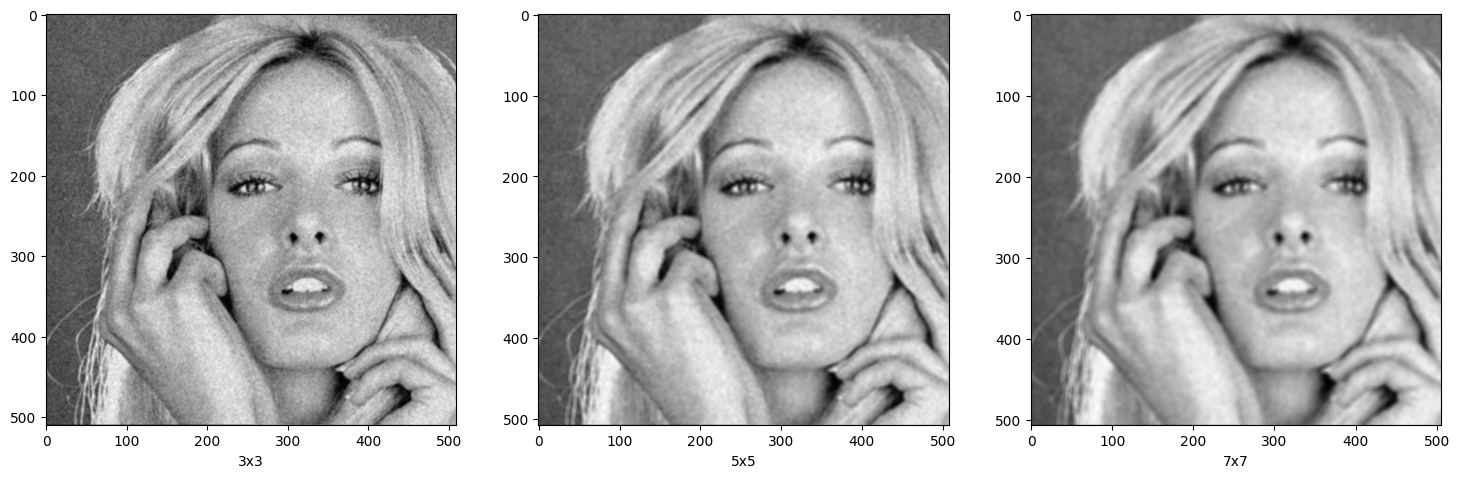

In [5]:
def conv(image, filter):
    iw,ih,id = image.shape
    
    fw,fh = filter.shape    
    out = np.zeros((iw-fw+1,ih-fh+1,id))
    
    for d in range(id):
        for w in range(ih-fh+1):
            for h in range(iw-fw+1):
                out[w,h,d] = np.sum(filter*image[w:w+fh , h:h+fw , d])
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)

    


fig = plt.figure(1, figsize=(18, 16))
print(" ========================================= Low Pass Filter =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    (lpfw,lpfh) = (i,i)
    lowPassFilter = np.ones((lpfw,lpfh))*1/(lpfw*lpfh)
    low_image = conv(img, lowPassFilter)
    imshow(low_image)
    cv2.imwrite("low"+str(i)+"x"+str(i)+".jpg",low_image)    
plt.show()

print()
fig = plt.figure(2, figsize=(18, 16))
print(" ========================================= Gaussian Filter =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    (gfw,gfh) = (i,i)
    gaussianFilter = gaussFilter((gfw,gfh),4)
    gaussian_image = conv(img, gaussianFilter)
    imshow(gaussian_image)
    cv2.imwrite("gaussian"+str(i)+"x"+str(i)+".jpg",gaussian_image)
plt.show()
    

 ========================================= Bilateral Filter =========================================


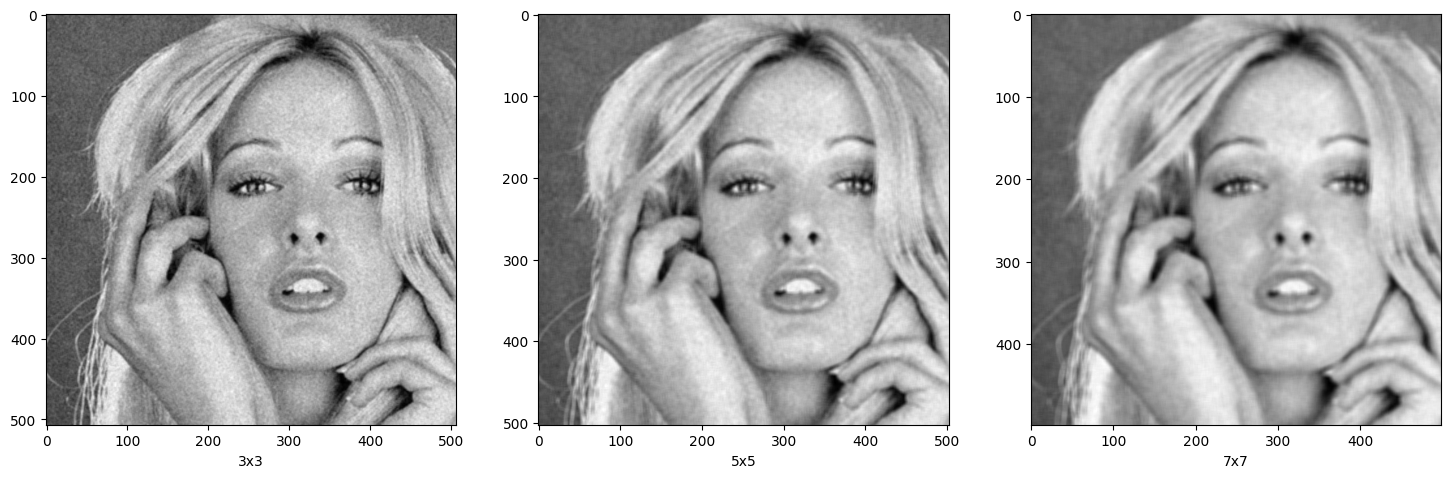

In [6]:
# bilateral filter

def bfunc(i,j,fw,fh,image,sigma1, sigma2, bilateralWFilter):
    imgwork = image[i - fh//2:i+1 + fh//2, j - fw//2:j+1 + fw//2, :]
    
    bilateralIFilter = ((imgwork - image[i, j,:])**2 )/(2*(sigma1**2))
    
    bilateralFilter = np.exp(-1*bilateralIFilter)*bilateralWFilter
    bilateralFilter = bilateralFilter/np.sum(bilateralFilter,axis=(0,1))
    return np.sum(np.multiply(imgwork, bilateralFilter),axis=(0,1))

def bilateralFilterConv(image, fw,fh):
    size = image.shape
    sigma1 = 40
    sigma2 = 40
    bilateral1 = 2*3.14*sigma2*sigma2*gaussFilter((fw,fh), sigma2)
    if len(image.shape) < 3  or image.shape[2] == 1:
        bilateralWFilter = np.resize(bilateral1,(*bilateral1.shape,1))
    else:
        bilateralWFilter = np.stack([bilateral1, bilateral1, bilateral1], axis=2)
    
    out = np.zeros((size[0]-2*fw +1,size[1]-2*fh +1,size[2]))
    for i in range(size[0]-2*fh +1):
        for j in range(size[1]-2*fw +1):
            out[i,j,:] = bfunc(i+fw-1, j+fh-1, fw, fh, image, sigma1, sigma2, bilateralWFilter)
    
    if id == 1:
        return np.resize(out, (out.shape[0], out.shape[1])).astype(np.uint8)
    else:
        return out.astype(np.uint8)


    
fig = plt.figure(1, figsize=(18, 16))
print(" ========================================= Bilateral Filter =========================================")
for i in range(3,8,2):
    splot = plt.subplot(130-1+((i+1)//2))
    splot.set_xlabel(str(i)+"x"+str(i))
    bfw,bfh = (i,i)
    bilateral_image = bilateralFilterConv(img, bfw,bfh)
    imshow(bilateral_image)
    cv2.imwrite("bilateral"+str(i)+"x"+str(i)+".jpg",bilateral_image)    
plt.show()
